In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim, num_classes, img_shape):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(z_dim + num_classes, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        labels = self.label_emb(labels)
        gen_input = torch.cat((noise, labels), dim=1)
        img = self.model(gen_input)
        return img.view(img.size(0), *img_shape)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_shape):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(np.prod(img_shape) + num_classes, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        labels = self.label_emb(labels)
        d_in = torch.cat((img.view(img.size(0), -1), labels), dim=1)
        validity = self.model(d_in)
        return validity


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
# Assuming 'MNIST' dataset and some common parameters
# Update these to your specific data and settings
img_shape = (1, 28, 28) # Example shape for MNIST images
num_classes = 10 # Example for MNIST dataset with 10 classes
z_dim = 100 # Dimension of noise vector

# Data Loading
# Create a transform to normalize the image data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a dataloader
batch_size = 64 # Choose an appropriate batch size
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ... (Rest of the code, including Generator, Discriminator, and training loop)

class Generator(nn.Module):
    def __init__(self, z_dim, num_classes, img_shape):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(z_dim + num_classes, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z, labels):
        # Implement the forward pass logic here
        labels = self.label_emb(labels)
        gen_input = torch.cat((z, labels), dim=1)
        img = self.model(gen_input)
        return img.view(img.size(0), *img_shape) # Reshape to image dimensions

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.27MB/s]


In [ ]:
pip install torch torchvision kagglehub[pandas-datasets] matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
pip install torch torchvision opendatasets matplotlib tqdm pillow

100%|██████████| 170M/170M [00:16<00:00, 10.5MB/s]


Epoch [1/30] Loss D: 0.4786, Loss G: 3.4921


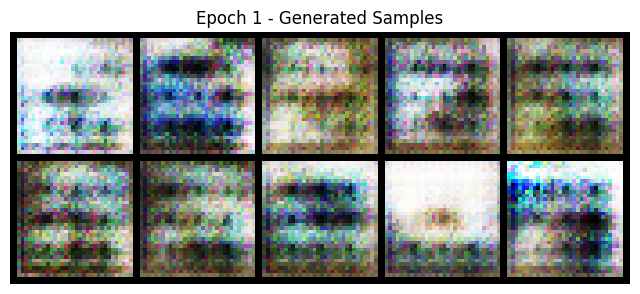

Epoch [2/30] Loss D: 0.6896, Loss G: 3.0113


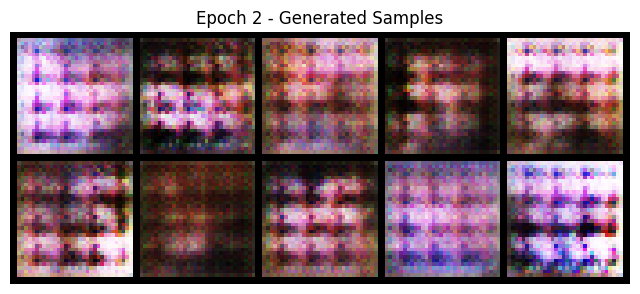

Epoch [3/30] Loss D: 0.6582, Loss G: 3.4441


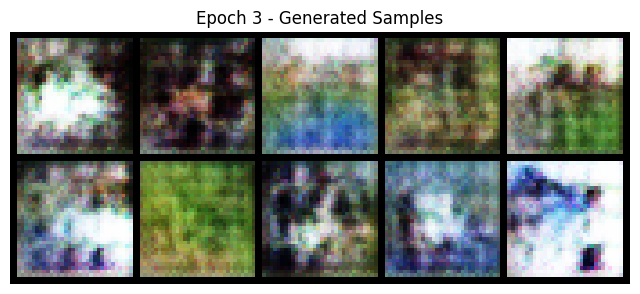

Epoch [4/30] Loss D: 0.7022, Loss G: 3.7787


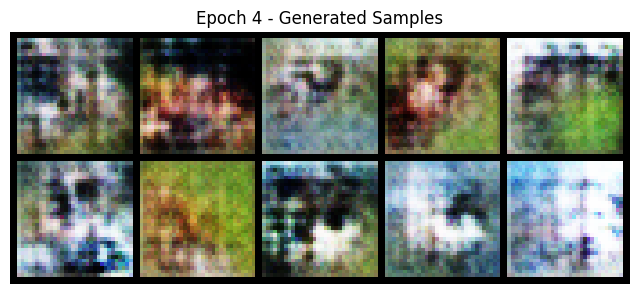

Epoch [5/30] Loss D: 0.5172, Loss G: 4.0215


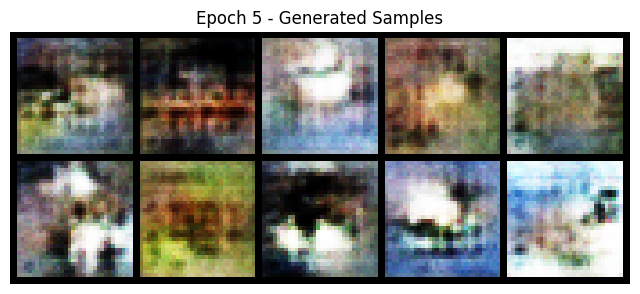

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
image_size = 32
z_dim = 100
embedding_dim = 50
num_classes = 10
batch_size = 128
epochs = 30
lr = 2e-4

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# CIFAR-10 dataset
train_data = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, embedding_dim)
        self.model = nn.Sequential(
            nn.ConvTranspose2d(z_dim + embedding_dim, 512, 4, 1, 0),
            nn.BatchNorm2d(512), nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.BatchNorm2d(256), nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128), nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z, labels):
        label_embedding = self.label_emb(labels)
        x = torch.cat([z, label_embedding], dim=1).unsqueeze(2).unsqueeze(3)
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, image_size * image_size)
        self.model = nn.Sequential(
            nn.Conv2d(4, 128, 4, 2, 1), nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2),
            nn.Conv2d(256, 512, 4, 2, 1), nn.BatchNorm2d(512), nn.LeakyReLU(0.2),
            nn.Conv2d(512, 1, 4, 1, 0), nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embedding = self.label_emb(labels).view(-1, 1, image_size, image_size)
        x = torch.cat([img, label_embedding], dim=1)
        return self.model(x).view(-1, 1).squeeze(1)

# Initialize models
G = Generator().to(device)
D = Discriminator().to(device)
criterion = nn.BCELoss()

opt_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

# Fixed noise and labels for visualization
fixed_noise = torch.randn(10, z_dim, device=device)
fixed_labels = torch.arange(0, 10, dtype=torch.long, device=device)

# Training Loop
for epoch in range(epochs):
    for real_imgs, labels in train_loader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        real = torch.ones(batch_size, device=device)
        fake = torch.zeros(batch_size, device=device)

        ### Train Discriminator ###
        noise = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = G(noise, labels)

        real_loss = criterion(D(real_imgs, labels), real)
        fake_loss = criterion(D(fake_imgs.detach(), labels), fake)
        d_loss = real_loss + fake_loss

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        ### Train Generator ###
        output = D(fake_imgs, labels)
        g_loss = criterion(output, real)

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

    with torch.no_grad():
        fake_imgs = G(fixed_noise, fixed_labels).detach().cpu()
    grid = make_grid(fake_imgs, nrow=5, normalize=True)
    plt.figure(figsize=(8, 4))
    plt.axis("off")
    plt.title(f"Epoch {epoch+1} - Generated Samples")
    plt.imshow(grid.permute(1, 2, 0))
    plt.show()